Upload dataset


In [ ]:
import pandas as pd
import numpy as np
# For Excel
#df = pd.read_excel('', sheet_name='Data', skiprows=3)

# For CSV (if converted)
#df = pd.read_csv('/gender_submission.csv')
#df = pd.read_csv('/test.csv')
#For EDA and cleaning, only train.csv is needed.

#Use gender_submission.csv only as a template to format your prediction results for Kaggle.


train_df = pd.read_csv('/train.csv')


train_df.head()         # View first 5 rows
train_df.info()         # Column types & non-null counts
train_df.describe()     # Summary stats (only for numerical columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


data cleaning

In [ ]:
#find missing value
train_df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
#Fill missing Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

/tmp/ipython-input-12-1580848397.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


In [ ]:
#fill missing Embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-13-1613448763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [ ]:
#find missing value
train_df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


EDA (Exploratory Data Analysis)

/tmp/ipython-input-17-3285985605.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='pastel')


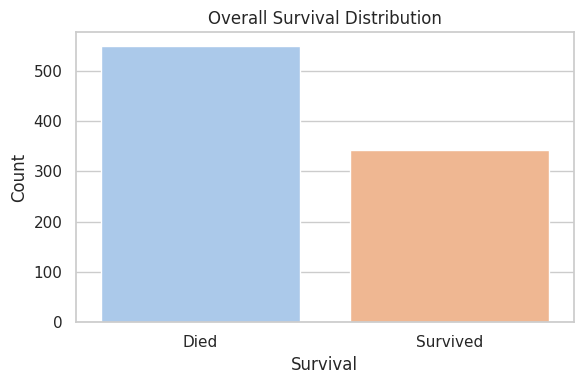

In [ ]:
#Survival Distribution:

import seaborn as sns
import matplotlib.pyplot as plt

# Survival count
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df, palette='pastel')
plt.title('Overall Survival Distribution')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.ylabel('Count')
plt.xlabel('Survival')
plt.tight_layout()
plt.show()



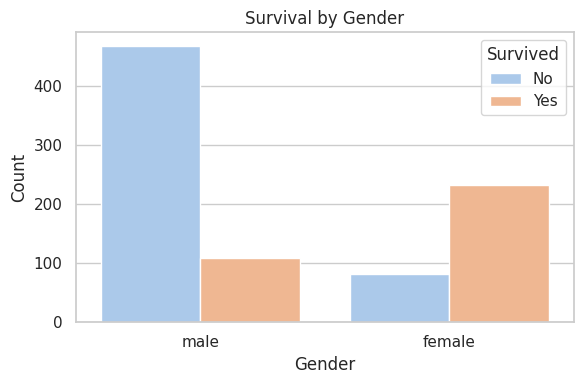

In [ ]:
#Survival by Gender:

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='pastel')
plt.title('Survival by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


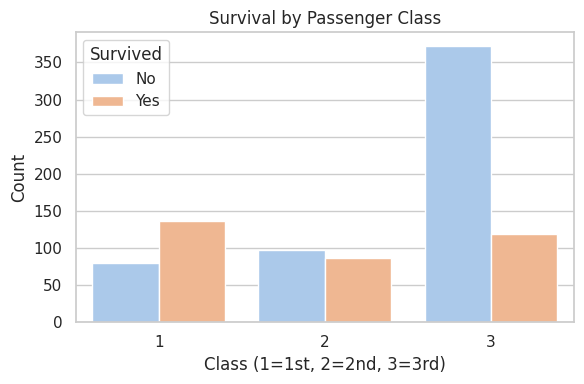

In [ ]:
#Survival by Passenger Class:

plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette='pastel')
plt.title('Survival by Passenger Class')
plt.xlabel('Class (1=1st, 2=2nd, 3=3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


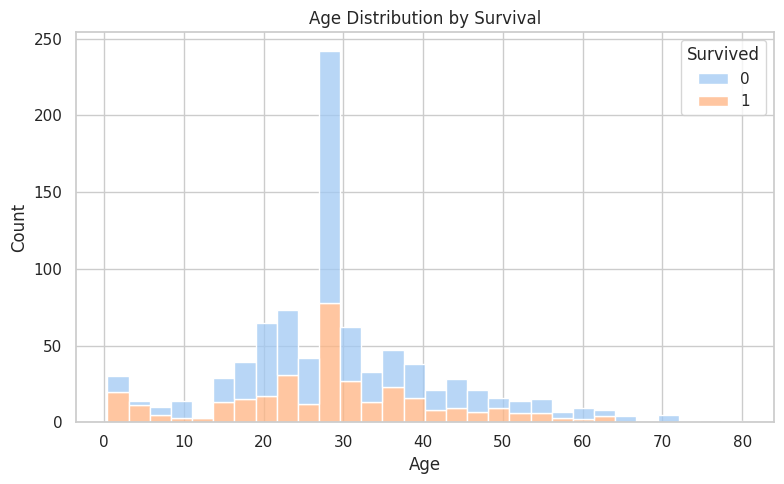

In [ ]:
#Age Distribution by Survival:

plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', palette='pastel', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


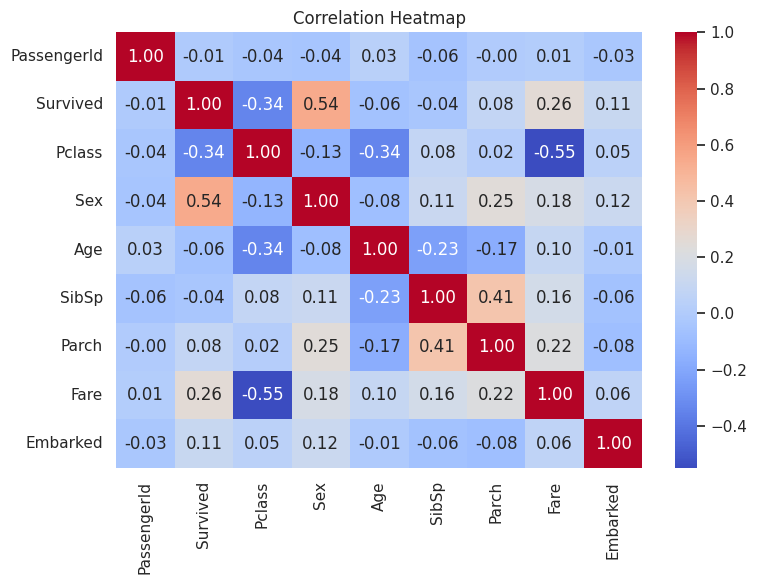

In [ ]:
#Correlation Heatmap:

import numpy as np

# Convert categorical columns
train_df_encoded = train_df.copy()
train_df_encoded['Sex'] = train_df_encoded['Sex'].map({'male': 0, 'female': 1})
train_df_encoded['Embarked'] = train_df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(train_df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
